# Convolution Neural Networks

To show how CNNs work in tensorflow , This notebook contains the binary classification problem of cats vs dogs using CNNs

In [ ]:
#importing the libraries
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os

# Images in NPY files

Npy files can be used to store numpy objects and I have stored the images and targets in this file as images are nothing but arrays with 3 axes.

To see , how I have prepared my image dataset with npy files, check out my medium post on that topic

In [ ]:
#importing the data
dataset = np.load('dogsvscats.npy')
labels = np.load('targets.npy')
print("shape of the data is : ",dataset.shape)

shape of the data is :  (24946, 50, 50, 3)


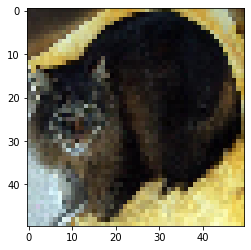

In [ ]:
#an image from the dataset
plt.imshow(dataset[0])

0


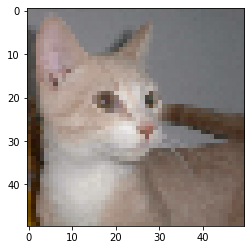

In [ ]:
#shuffling the dataset
seed = np.random.randint(0,1000)
np.random.seed(seed)
np.random.shuffle(dataset)
np.random.seed(seed)
np.random.shuffle(labels)
plt.imshow(dataset[0])
print(labels[0])

In [ ]:
#training and test set split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(dataset,labels)

In [ ]:
#shape of training and test set
print("shape of training set is : ",x_train.shape)
print("shape of testing set is : ",x_test.shape)

shape of training set is :  (18709, 50, 50, 3)
shape of testing set is :  (6237, 50, 50, 3)


In [ ]:
#scaling the images
x_train = x_train/255.
x_test = x_test/255.

In [ ]:
#creating a model
i = tf.keras.layers.Input(shape=(50,50,3))

#first layer
conv1 = tf.keras.layers.Conv2D(filters=10,kernel_size=(5,5),strides=(1,1),padding='same',activation=tf.keras.activations.relu)(i)
pool1 = tf.keras.layers.MaxPool2D((2,2))(conv1)
batch1 = tf.keras.layers.BatchNormalization()(pool1)

#second layer
conv2 = tf.keras.layers.Conv2D(filters=28,kernel_size=(3,3),strides=(1,1),padding='same',activation=tf.keras.activations.relu)(batch1)
pool2 = tf.keras.layers.MaxPool2D((2,2))(conv2)
batch2 = tf.keras.layers.BatchNormalization()(pool2)

#third layer
conv3 = tf.keras.layers.Conv2D(filters=50,kernel_size=(5,5),strides=(1,1),padding='same',activation=tf.keras.activations.relu)(batch2)
pool3 = tf.keras.layers.MaxPool2D((2,2))(conv3)
batch3 = tf.keras.layers.BatchNormalization()(pool3)

#fourth layer
conv4 = tf.keras.layers.Conv2D(filters=100,kernel_size=(3,3),strides=(1,1),padding='same',activation=tf.keras.activations.relu)(batch3)
pool4 = tf.keras.layers.MaxPool2D((2,2))(conv4)
batch4 = tf.keras.layers.BatchNormalization()(pool4)

#fifth layer
conv5 = tf.keras.layers.Conv2D(filters=180,kernel_size=(3,3),strides=(1,1),padding='same',activation=tf.keras.activations.relu)(batch4)
pool5 = tf.keras.layers.MaxPool2D((2,2))(conv5)
batch5 = tf.keras.layers.BatchNormalization()(pool5)

#sixth layer
flatten1 = tf.keras.layers.Flatten()(batch5)
fc1 = tf.keras.layers.Dense(512,activation=tf.keras.activations.relu)(flatten1)
fc2 = tf.keras.layers.Dense(700,activation=tf.keras.activations.relu,kernel_regularizer=tf.keras.regularizers.l1(l1=0.01))(fc1)

#final layer
output = tf.keras.layers.Dense(1,activation=tf.keras.activations.sigmoid)(fc2)

model = tf.keras.models.Model(i,output)

In [ ]:
#optimizer and loss
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005),loss=tf.keras.losses.binary_crossentropy,metrics=['accuracy'])

In [ ]:
#train the model
train = model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=5)

Epoch 1/5
585/585 [==============================] - 94s 161ms/step - loss: 11.3535 - accuracy: 0.6833 - val_loss: 1.0716 - val_accuracy: 0.5729
Epoch 2/5
585/585 [==============================] - 94s 161ms/step - loss: 0.7283 - accuracy: 0.7756 - val_loss: 0.7082 - val_accuracy: 0.7898
Epoch 3/5
585/585 [==============================] - 94s 160ms/step - loss: 0.6282 - accuracy: 0.8228 - val_loss: 0.6966 - val_accuracy: 0.7884
Epoch 4/5
585/585 [==============================] - 94s 160ms/step - loss: 0.5594 - accuracy: 0.8602 - val_loss: 0.6646 - val_accuracy: 0.8005
Epoch 5/5
585/585 [==============================] - 93s 160ms/step - loss: 0.4938 - accuracy: 0.8891 - val_loss: 0.6702 - val_accuracy: 0.8063


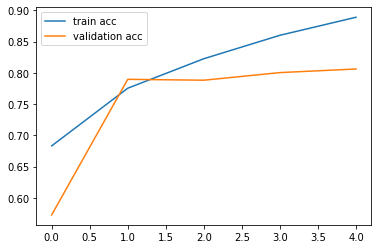

In [ ]:
#plotting accuracy
plt.plot(train.history['accuracy'],label='train acc')
plt.plot(train.history['val_accuracy'],label='validation acc')
plt.legend()

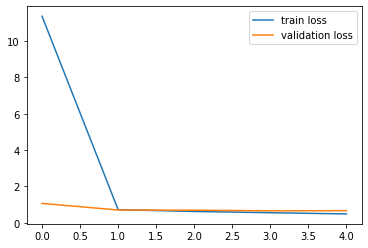

In [ ]:
#plotting loss
plt.plot(train.history['loss'],label='train loss')
plt.plot(train.history['val_loss'],label='validation loss')
plt.legend()

In [ ]:
#saving the model
model.save('catsvsdogs1.h5')

Cat


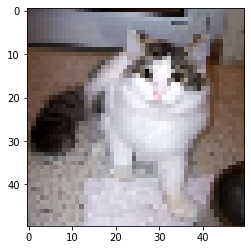

In [ ]:
#making a random prediction
import random 
ran = random.randint(0,5000)
y_pred = model.predict(x_test[ran].reshape(-1,50,50,3))
plt.imshow(x_test[ran])
y_pred.round()
if y_pred == 1:
    print("Dog")
else:
    print("Cat")